## Implementacja Bootstrapu

In [8]:
from sklearn.utils import resample
import pandas as pd

In [11]:
fifa = pd.read_csv('fifa22.csv')
fifa.drop(labels = ['club_jersey_number', 'club_loaned_from','nation_team_id', 'nation_position', 'nation_jersey_number',
       'league_name', 'league_level', 'club_position','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'nationality_id', 'club_joined',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'dob', 'club_team_id', 'real_face',
       'sofifa_id', 'player_url','player_face_url', 'club_logo_url', 'club_flag_url', 'player_tags','player_traits',
       'nation_logo_url', 'nation_flag_url','international_reputation'],axis = 1,inplace = True)
fifa.shape

(19239, 60)

In [37]:
#Błąd standardowy - bada zmienność w rozkładzie próbkowania statystyk
rezultaty = []
for npowt in range(1000):
    probka = resample(fifa,n_samples=1000)
    rezultaty.append(probka.overall.median())
rezultaty = pd.Series(rezultaty)
print('Statystyki bootstrapowe:')
print('Pierwotnie: ' + str(fifa.overall.median()))
print('Obciążenie: ' + str(rezultaty.mean() - fifa.overall.median()))
print('Błąd standardowy: ' + str(rezultaty.std())) #wraz ze wzrostem próby błąd standardowy maleje, spada też obiążenie

Statystyki bootstrapowe:
Pierwotnie: 66.0
Obciążenie: -0.2535000000000025
Błąd standardowy: 0.4303172352148186


## Przedział ufności dla boostrapowej próby

In [59]:
rezultaty2 = []
poziom_istotnosci = 0.05 #level of confidence
for npowt in range(1000):
    probka = resample(fifa,n_samples=1000)
    rezultaty2.append(probka.overall.median())
rezultaty2 = pd.Series(rezultaty2)
rezultaty2.sort_values(inplace=True)
rezultaty2.drop(rezultaty2.nsmallest(int(poziom_istotnosci*rezultaty2.shape[0])).index,inplace=True)
rezultaty2.drop(rezultaty2.nlargest(int(poziom_istotnosci*rezultaty2.shape[0])).index,inplace=True)
print("90 % przedział ufności: (" + str(rezultaty2.min()) + ":" + str(rezultaty2.max()) + ")")

90 % przedział ufności: (65.0:66.0)


## Rozkład normalny - wykres K-K

In [71]:
from scipy import stats
import matplotlib.pyplot as plt

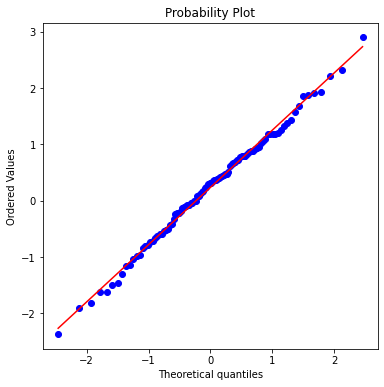

In [72]:
fig,ax = plt.subplots(figsize = (6,6))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax); 
#Wygenerowanie 100 wartości z rozkładu normalnego i rozrysowanie wykresu K-K. Jak widać punkty układają się w linię

In [2]:
# Binarny - PDF , CDF
from scipy import stats
print(stats.binom.pmf(2,n=5,p=0.1)) # p-o 2 sukcesów w próbie wielkości 5 gdzie p-o sukesu wynosi 0.1
print(stats.binom.cdf(2,n=5,p=0.1)) # p-o skumulowane że sukesów będzie dokładnie 2 lub mniej

0.0729
0.99144


In [3]:
# Losowe generowanie liczb - Poisson, Exponential, Weibull
stats.poisson.rvs(2,size= 100)#generowanie 100 liczb z roz.Poissona(lambda = 2)

array([3, 5, 3, 2, 3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 2, 0, 1, 1, 0, 6, 1,
       2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 6, 3, 1, 4, 2, 0, 4, 0, 1, 4, 3,
       5, 2, 1, 2, 3, 1, 2, 1, 3, 1, 3, 2, 0, 2, 2, 1, 0, 4, 5, 3, 1, 5,
       0, 0, 2, 4, 0, 4, 1, 1, 1, 1, 1, 1, 5, 2, 0, 3, 7, 2, 3, 3, 1, 1,
       1, 2, 0, 2, 3, 4, 1, 3, 3, 3, 1, 1])

In [4]:
stats.expon.rvs(0.2,size= 100)#generowanie 100 liczb z roz.wykladniczego(lambda = 2)

array([0.61520688, 2.47711116, 0.92967399, 0.38549022, 2.56345207,
       0.92220679, 0.63127129, 0.21567228, 0.92429662, 2.45146199,
       0.26129596, 0.8257375 , 1.10527157, 0.79650865, 1.1909251 ,
       1.24270442, 0.30320078, 1.86945562, 0.89765866, 1.62368082,
       1.34674966, 1.23320173, 1.73572937, 1.53337931, 0.29377436,
       0.56641864, 2.79202371, 0.67682317, 0.58266356, 1.51360999,
       0.98516976, 0.38009945, 1.06419869, 1.11705327, 1.30508897,
       3.08178848, 0.31475747, 0.54268411, 0.41960383, 1.02172112,
       1.448625  , 0.32142805, 2.16996346, 0.86501313, 0.59280457,
       1.98836343, 0.27912176, 1.02783702, 0.95562706, 0.46152997,
       0.7457425 , 1.2112236 , 0.31591088, 1.73244536, 4.33607507,
       2.51531911, 1.1525485 , 1.70163604, 1.75517453, 0.409257  ,
       0.43403418, 2.11052217, 0.54969691, 0.45424289, 0.82007916,
       1.85016868, 1.00698581, 2.71015353, 3.35993643, 2.89803276,
       0.37049723, 1.09220752, 0.48985033, 1.0428441 , 0.39037

In [5]:
stats.weibull_min.rvs(1.5,scale = 5000,size = 100)
#generowanie 100 liczb z roz.weibulla parametr beta 1.5 (czyli p-o wystapienia zdarzenia rosnie w czasie)

array([ 4107.67120607,  1185.11729589,  3994.75377497,  2743.68192385,
         964.09645897,  3239.31040111,  4854.63167924,  8235.24301569,
       11038.215262  ,  6224.80078556,  3061.36064518,   450.99105394,
        5770.43333661,  1222.65311685,  4557.98014279,  7389.44878961,
         379.28626137,  3989.63687043,  3848.2262423 ,  4518.91661472,
        3024.66253521,  3335.29898052,  8697.19169566,  2683.69822937,
        2969.11668015,  6025.78100528,  5751.39618355,  1624.39015836,
        4597.8405753 ,   927.66914725,  7127.02991678,  1206.8759744 ,
        1472.44214702,  6248.89693912,  4425.80620464,  5836.63902803,
        6775.49439192,   683.77758114,  9652.26825312,  7904.2637735 ,
        4763.38351293,  3250.45369724,  5654.10379305,  7048.99359253,
       10285.0155843 ,  3684.29013226,  7252.56681516,  4963.47262847,
        6733.45874689,  9868.16766468,  2881.62179672,  2943.30086983,
        1273.26411091, 12347.39993731,  3549.30402809,  1555.38376655,
      